# The Second Derivative

In the previous lesson, we saw that Newton's method for optimization requires the derivative of a derivative. This has a formal name: the **second derivative**.

The second derivative gives us crucial information about a function's **curvature**—the way it bends. This is very useful in optimization for distinguishing between a maximum and a minimum.

### Notation
* **Leibniz's Notation:** $\frac{d^2f}{dx^2}$
* **Lagrange's Notation:** $f''(x)$ (read as "f double-prime of x")

---
## An Analogy: Distance, Velocity, and Acceleration

The best way to understand the second derivative is to return to our car analogy.
* If the function `x(t)` represents the **distance** traveled by a car...
* ...then its first derivative, `x'(t)` or `dx/dt`, is the **velocity**.
* ...and its second derivative, `x''(t)` or `d²x/dt²`, is the **acceleration**.

Acceleration is the *rate of change of velocity*.
* **Positive acceleration:** You are speeding up.
* **Negative acceleration:** You are slowing down (decelerating).
* **Zero acceleration:** You are moving at a constant velocity.

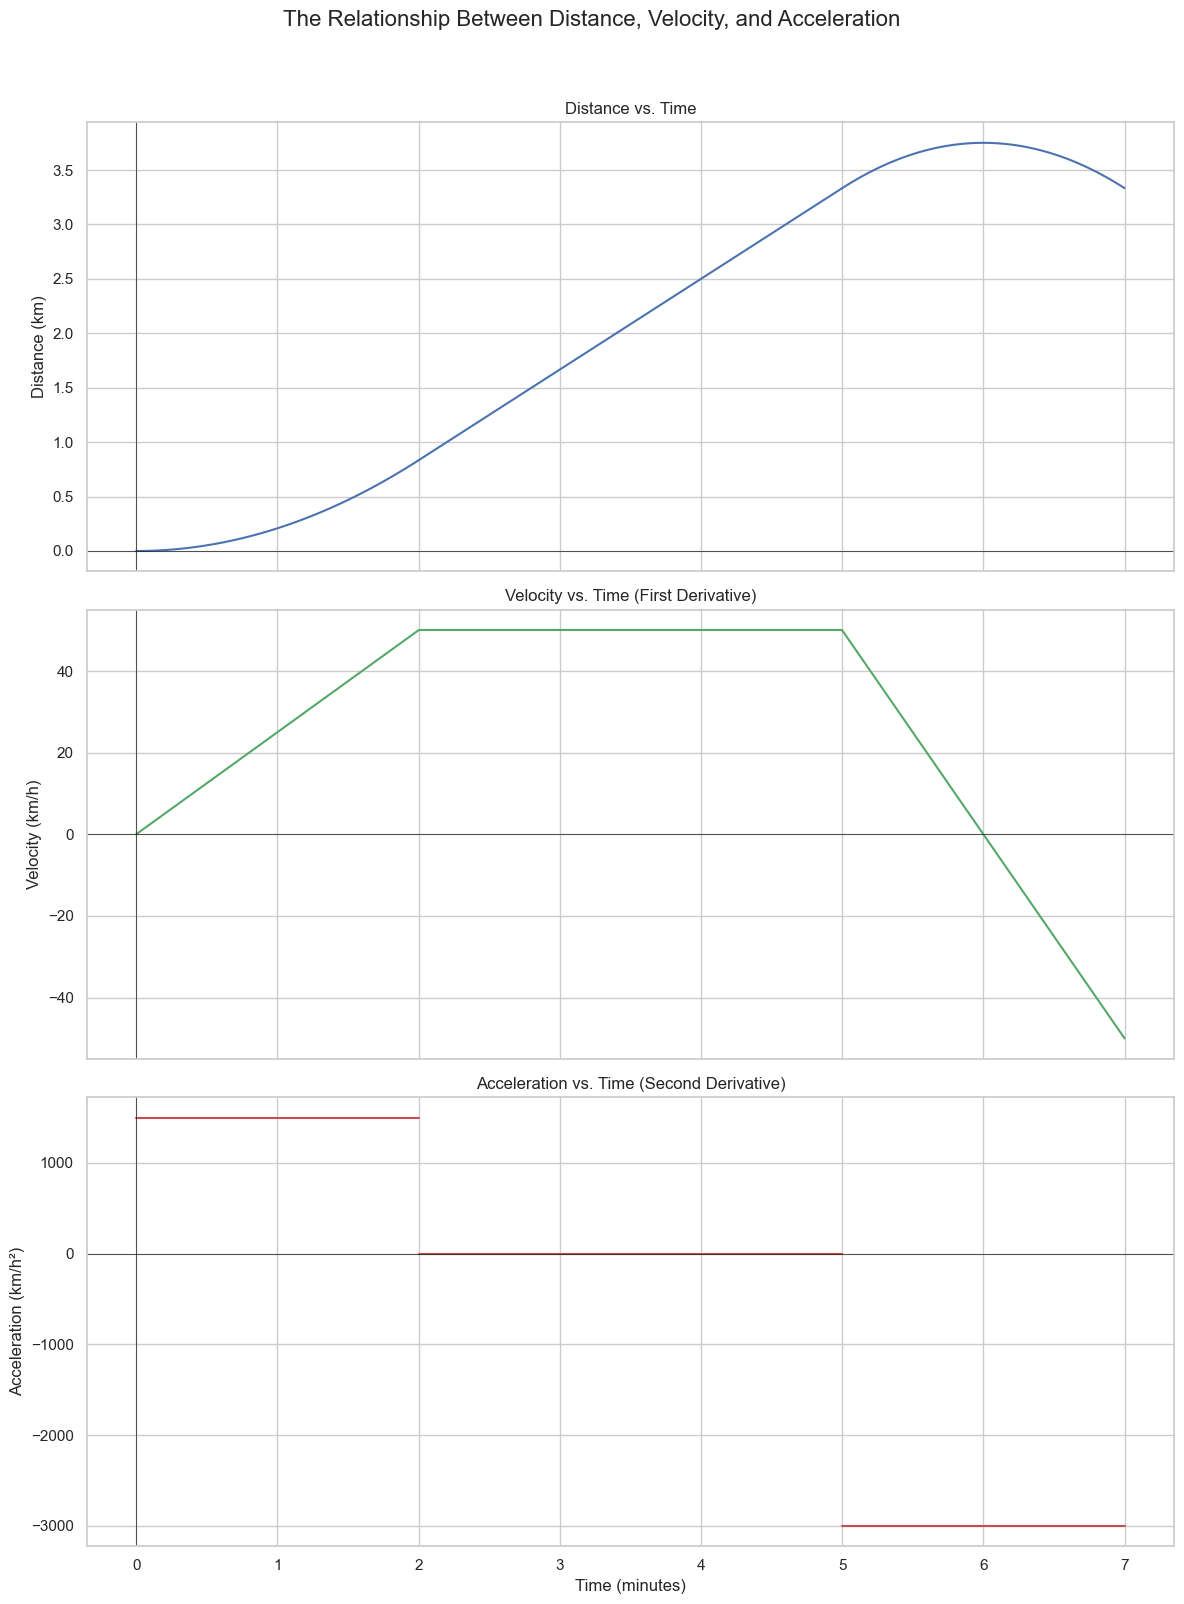

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define piecewise functions for the car's journey ---
# Phase 1: Accelerating (0 to 2 mins)
t1 = np.linspace(0, 2/60, 100)
dist1 = 750 * t1**2
vel1 = 1500 * t1
acc1 = np.full_like(t1, 1500)

# Phase 2: Constant Velocity (2 to 5 mins)
t2 = np.linspace(2/60, 5/60, 100)
dist2 = 50*t2 - 5/6
vel2 = np.full_like(t2, 50)
acc2 = np.full_like(t2, 0)

# Phase 3: Decelerating and Turning Around (5 to 7 mins)
t3 = np.linspace(5/60, 7/60, 100)
dist3 = -1500*t3**2 + 300*t3 - 11.25 # Adjusted for continuity
vel3 = -3000*t3 + 300
acc3 = np.full_like(t3, -3000)

# --- Create the plot with three subplots ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
fig.suptitle('The Relationship Between Distance, Velocity, and Acceleration', fontsize=16, y=0.92)

# --- Plot 1: Distance ---
ax1.plot(t1*60, dist1, 'b-')
ax1.plot(t2*60, dist2, 'b-')
ax1.plot(t3*60, dist3, 'b-')
ax1.set_title('Distance vs. Time')
ax1.set_ylabel('Distance (km)')

# --- Plot 2: Velocity (1st Derivative) ---
ax2.plot(t1*60, vel1, 'g-')
ax2.plot(t2*60, vel2, 'g-')
ax2.plot(t3*60, vel3, 'g-')
ax2.set_title('Velocity vs. Time (First Derivative)')
ax2.set_ylabel('Velocity (km/h)')

# --- Plot 3: Acceleration (2nd Derivative) ---
ax3.plot(t1*60, acc1, 'r-')
ax3.plot(t2*60, acc2, 'r-')
ax3.plot(t3*60, acc3, 'r-')
ax3.set_title('Acceleration vs. Time (Second Derivative)')
ax3.set_ylabel('Acceleration (km/h²)')
ax3.set_xlabel('Time (minutes)')

# --- Format all plots ---
for ax in [ax1, ax2, ax3]:
    ax.grid(True)
    ax.axvline(0, color='k', linewidth=0.5)
    ax.axhline(0, color='k', linewidth=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

---

## The Second Derivative and Curvature (Concavity)

The second derivative gives us a measure of the **curvature** of a function, also known as its **concavity**.

* If $f''(x) > 0$, the function is **concave up** (like a happy face 😊). This means the slope (the first derivative) is increasing. In our car example, this corresponds to positive acceleration.
* If $f''(x) < 0$, the function is **concave down** (like a sad face 😞). This means the slope is decreasing. This corresponds to negative acceleration (deceleration).
* If $f''(x) = 0$, the function has no curvature at that point (it's a straight line).

---
## The Second Derivative Test for Optimization

This property is extremely useful for optimization. We already know that candidates for maxima and minima occur where the first derivative is zero ($f'(x) = 0$). The **second derivative test** helps us classify these points.

Let's say we have a point `c` where $f'(c) = 0$.
1.  **If $f''(c) > 0$ (concave up):** The point `c` is a **local minimum**.
2.  **If $f''(c) < 0$ (concave down):** The point `c` is a **local maximum**.
3.  **If $f''(c) = 0$:** The test is inconclusive.

This is a powerful tool because it allows us to distinguish between the peaks and valleys of a function by simply checking the sign of the second derivative at the points where the slope is flat.